# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Use one or more of three predictors (GPA, GRE score, and prestige of the applicant's undergraduate school) to predict the likelihood that applicants will be admitted to graduate school.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: Each row represents one applicant. The predictors are *gpa*, *gre*, and *prestige*. The outcome is *admit*.

The values of *gpa* and *gre* are self-explanatory. *Prestige* ranges from 1 to 4, where 1 is best. *Admit* is 0 (not admitted) or 1 (admitted).

Rows containing any missing values have been excluded from the data analyzed. Dummy variables were created for *prestige*.

### Demo: Provide a table that explains the data by admission status

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

#Drop rows with missing values for any column
df_raw.dropna(axis=0, how='any', inplace=True)

df_dummies = pd.get_dummies(data=df_raw, prefix="prestige", columns=["prestige"])

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [2]:
grouped_data = df_dummies.groupby(['admit'])

print(grouped_data['gpa'].describe().unstack())
print(grouped_data['gre'].describe().unstack())

p1 = df_dummies.loc[df_dummies['prestige_1.0'] == 1]
print(pd.crosstab(p1.admit, p1['prestige_1.0'], margins=True))
print(pd.crosstab(p1.admit, p1['prestige_1.0'], margins=True, normalize='columns'))

p2 = df_dummies.loc[df_dummies['prestige_2.0'] == 1]
print(pd.crosstab(p2.admit, p2['prestige_2.0'], margins=True))
print(pd.crosstab(p2.admit, p2['prestige_2.0'], margins=True, normalize='columns'))

p3 = df_dummies.loc[df_dummies['prestige_3.0'] == 1]
print(pd.crosstab(p3.admit, p3['prestige_3.0'], margins=True))
print(pd.crosstab(p3.admit, p3['prestige_3.0'], margins=True, normalize='columns'))

p4 = df_dummies.loc[df_dummies['prestige_4.0'] == 1]
print(pd.crosstab(p4.admit, p4['prestige_4.0'], margins=True))
print(pd.crosstab(p4.admit, p4['prestige_4.0'], margins=True, normalize='columns'))


       count      mean       std   min   25%    50%     75%  max
admit                                                           
0      271.0  3.347159  0.376355  2.26  3.08  3.340  3.6100  4.0
1      126.0  3.489206  0.371655  2.42  3.22  3.545  3.7575  4.0
       count        mean         std    min    25%    50%    75%    max
admit                                                                  
0      271.0  573.579336  116.052798  220.0  500.0  580.0  660.0  800.0
1      126.0  618.571429  109.257233  300.0  540.0  620.0  680.0  800.0
prestige_1.0   1  All
admit                
0             28   28
1             33   33
All           61   61
prestige_1.0         1       All
admit                           
0             0.459016  0.459016
1             0.540984  0.540984
prestige_2.0    1  All
admit                 
0              95   95
1              53   53
All           148  148
prestige_2.0         1       All
admit                           
0             0.641892  0.641

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | 3.347159 (0.376355)  | 3.489206 (0.371655)
GRE |573.579336 (116.052798) | 618.571429 (109.257233)
Prestige 1 | 28 (45.9%) | 33 (54.1%)
Prestige 2 | 95 (64.2%) | 53 (35.8%)
Prestige 3 |93 (76.9%) | 28 (23.1%)
Prestige 4 |55 (82.1%) | 12 (17.9%)

### Methods: Write up the methods used in your analysis

Answer: After preparing the data as described and shown above, I fitted a logistic regression model (logit) to the data using Python Pandas. This enables us to see the effects of the various predictors on the outcome, and how confident we can be that each of the predictors actually affects the outcome.

### Results: Write up your results

In [3]:
df_dummies.describe()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,0.153652,0.372796,0.304786,0.168766
std,0.466044,115.717787,0.380208,0.361070,0.484159,0.460898,0.375017
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.400000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


Answer:

Prestige appears to have the strongest association with admission. The p-values for the prestige dummy variables are low. This correlation is inverse because higher actual prestige is expressed in the data with lower numeric values (1=highest prestige, 4=lowest prestige).

GPA appears to have a somewhat weaker association with admission. For each unit increase in GPA, the odds of admission increase by a factor of about 2. (GPA ranges from 2.26 to 4.00, so a unit increase is relatively large.)

GRE appears to be most weakly associated with admission. For each unit increase in GRE score, the odds of admission increase by a factor of slightly over 1.00. (GRE scores range from 220 to 800, so a unit increase in GRE score is relatively small.)

### Visuals: Provide a table or visualization of these results

In [3]:
import seaborn as sns

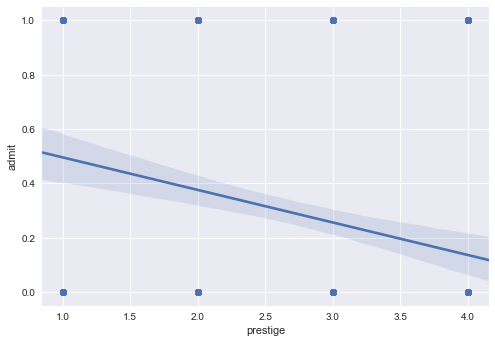

In [4]:
sns.regplot(df_raw.prestige, df_raw.admit)

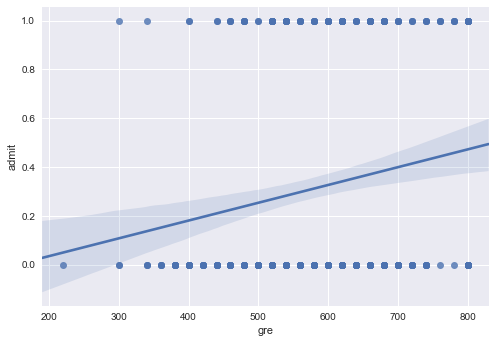

In [8]:
sns.regplot(df_raw.gre, df_raw.admit)

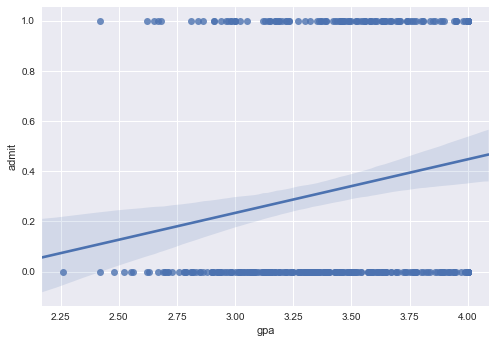

In [7]:
sns.regplot(df_raw.gpa, df_raw.admit)

### Discussion: Write up your discussion and future steps

Given these findings, it would be interesting to consider whether there are other factors that might influence admission more strongly, and whether these could be examined (they might not be captured as data). Particularly, the associations for GRE and GPA are not strong, so I wonder whether there are factors other than prestige that correlate strongly with admission.